# LAB04: Regresion y agrupamientov2
##### Grupo: B05

Si estamos utilizando google colab, en vez de clonar el repositorio, con wget obtenemos el archivo que contiene el dataset

In [1]:
import os

filename = 'wine_alcohol.csv'
url = 'https://github.com/Alf-caput/LAB04_Regresion_y_agrupamiento/raw/main/wine_alcohol.csv'

if not os.path.exists(filename):
    os.system('wget' + ' ' + url)

Junto con las librerías requeridas

In [2]:
import os

requirements = 'requirements.txt'
url = 'https://github.com/Alf-caput/LAB04_Regresion_y_agrupamiento/raw/main/requirements.txt'

if not os.path.exists(requirements):
    os.system('wget' + ' ' + url)

os.system('pip install -r requirements.txt')

0

### Ejercicio 2: Regresión lineal múltiple

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

#### Análisis del dataset

In [4]:
df = pd.read_csv(filename, delimiter=';')
df.head()

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,wine type,alcohol
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,1,9.4
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,5,1,9.8
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,5,1,9.8
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,6,1,9.8
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,1,9.4


La columna 'id' es innecesaria.  Se elimina.

In [5]:
df = df.drop(columns = ['id'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  quality               6497 non-null   int64  
 11  wine type             6497 non-null   int64  
 12  alcohol               6497 non-null   float64
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


No hay valores NaN y cada variable contiene 6497 observaciones.

Se pasarán quality y wine type a dummies, ya que sus valores son enteros que se refieren a distintas categorías: wine type tiene las categorías 1 y 2 y quality tiene las categorías 4, 5, 6, 7, 8, 9.

In [7]:
df2 = df.drop(columns = ['wine type','quality']) # esto se usará más adelante
df = pd.get_dummies(df, columns=['quality', 'wine type'], drop_first=True)

Se verá ahora la distribución de la variable objetivo, que es el grado de alcohol.

C:\Users\alfre\AppData\Local\Temp\ipykernel_17704\211739923.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['alcohol'], shade=True, color='blue')


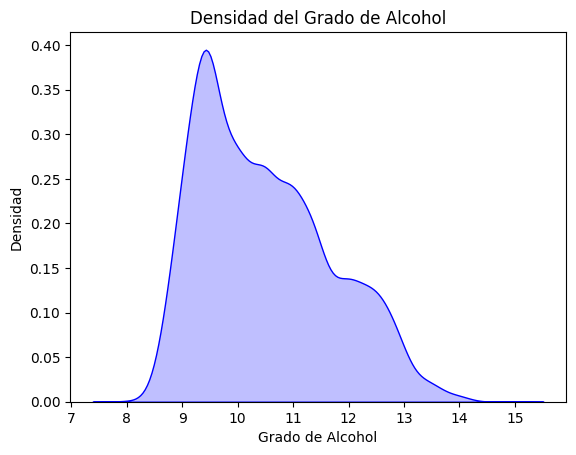

In [8]:
sns.kdeplot(df['alcohol'], shade=True, color='blue')
plt.title('Densidad del Grado de Alcohol')
plt.xlabel('Grado de Alcohol')
plt.ylabel('Densidad')
plt.show()

La variable objetivo es continua.  Toma valores desde 8 a 14.9 grados.  La mayor parte de los vinos están entre los 9 y 10 grados de alcohol.  Desde los 10 grados de alcohol, empiezan a haber menos vinos con más de 10 grados.

Esto debe tenerse en cuenta a la hora de predecir el grado de alcohol, pues hay muchos más datos con cierto grado de alcohol, como ya se ha mencionado.

Ahora se estudiará la multicolinealidad entre variables, la cual es preferible eliminar.

C:\Users\alfre\AppData\Local\Temp\ipykernel_17704\3291259726.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(calidad, rotation=45)
C:\Users\alfre\AppData\Local\Temp\ipykernel_17704\3291259726.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(['Tipo 1', 'Tipo 2'], rotation=0)


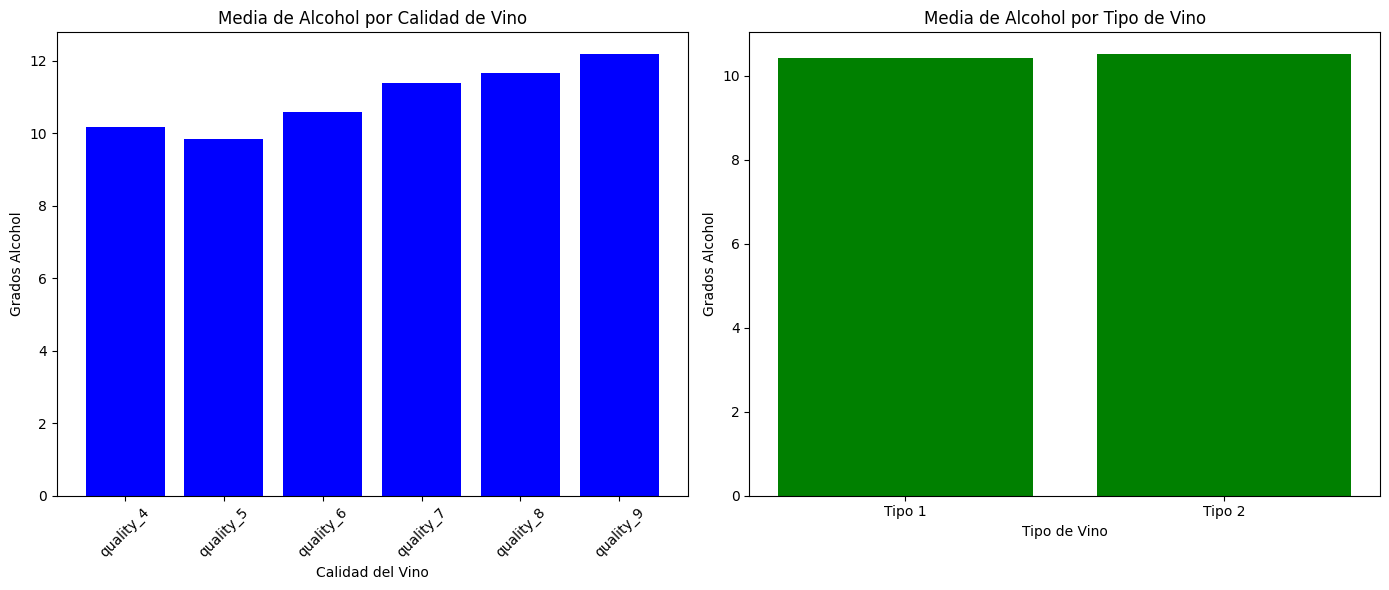

In [9]:
calidad = [f'quality_{i}' for i in range(4, 10) if f'quality_{i}' in df.columns]
media_alcohol_calidad= [df[df[label] == 1]['alcohol'].mean() for label in calidad]

tipo_vino = ['wine type_1', 'wine type_2']
media_alcohol_tipo = [df[df['wine type_2'] == (i-1)]['alcohol'].mean() for i in range(1, 3)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.bar(calidad, media_alcohol_calidad, color='blue')
ax1.set_title('Media de Alcohol por Calidad de Vino')
ax1.set_xlabel('Calidad del Vino')
ax1.set_ylabel('Grados Alcohol')
ax1.set_xticklabels(calidad, rotation=45)

ax2.bar(tipo_vino, media_alcohol_tipo, color='green')
ax2.set_title('Media de Alcohol por Tipo de Vino')
ax2.set_xlabel('Tipo de Vino')
ax2.set_ylabel('Grados Alcohol')
ax2.set_xticklabels(['Tipo 1', 'Tipo 2'], rotation=0)

plt.tight_layout()
plt.show()


Con respecto de las variables dummy de quality y wine type, puede verse, sobre todo con wine type, que cada categoría tiene una media muy similar o igual a las demás de grado de alcohol.  Esto puede indicar una baja relación de dichas variables con la variable objetivo.

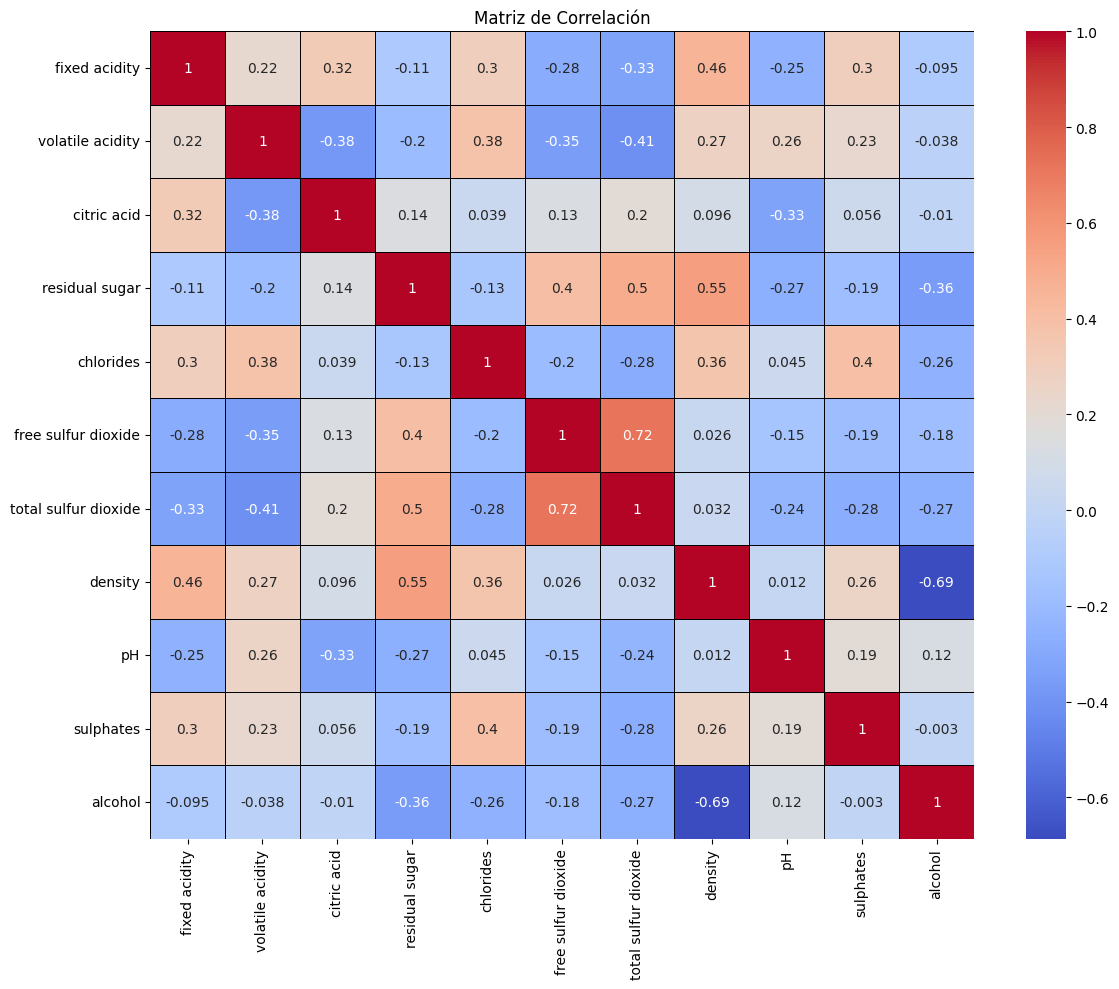

In [10]:
correlation_matrix = df2.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')

plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

Las variables más correlacionadas con 'alcohol' son 'density' y 'residual sugar', aunque se trata de una relación débil.  Las variables menos correlacionadas con 'density' son 'citric acid', 'free sulfur dioxide' y 'pH'. Los atributos menos relacionados con 'residual sugar' son 'citric acids' y 'chlorides'.  Estas pueden ser útiles, pues se evita la multicolinealidad.

In [11]:
print('Las variables más dependientes entre sí son:\n')
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        correlation = correlation_matrix.iloc[i, j]
        if correlation >= abs(0.5):
            var1 = correlation_matrix.columns[i]
            var2 = correlation_matrix.columns[j]
            print(f"{var1} y {var2}")


Las variables más dependientes entre sí son:

residual sugar y density
free sulfur dioxide y total sulfur dioxide


No hay correlaciones demasiado fuertes.  Tomando las correlaciones mayores o iguales a 0.5 en valor absoluto, las variables más correlacionadas son: **free sulfur dioxide** + **total sulfur dioxide** y **residual sugar** + **density**.  La primera es una correlación positiva y la tercera es negativa.


Para este modelo de regresión múltiple, se tendrán en cuenta los siguientes atributos: free sulfur dioxide, density, residual sugar, pH y citric acid, en base al previo análisis de dependencia entre variables.  También se ha añadido la variable 'wine type2', ya que al probar se ha visto una mejora razonable en el rendimiento del modelo.

#### 1- Crear los diferentes conjuntos de entrenamiento y test para el dataset (0.25 puntos).  

Se dividen los datos en conjuntos de entrenamiento y test:

In [12]:
X = df.drop('alcohol', axis=1)
y = df['alcohol']

# División del dataset en conjunto de entrenamiento y de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (4872, 17)
Tamaño del conjunto de prueba: (1625, 17)


#### 2- Construir  un  modelo  de  regresión  que  utilice  al  menos  4  de  los  atributos (1.5 puntos)
Disponibles en el dataset mediante la utilización de un proceso aprendizaje iterativo. (es  posible  utilizar  más atributos)

A continuación se construye el modelo de regresión lineal múltiple.

In [13]:
atributos = df[['free sulfur dioxide','residual sugar','wine type_2', 'density','pH','citric acid','chlorides']]
objetivo = df['alcohol']
X_train, X_test, y_train, y_test = train_test_split(atributos, objetivo, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((5197, 7), (1300, 7), (5197,), (1300,))

Para hacer el aprendizaje iterativo, se empleará el método de descenso de gradiente.

In [14]:
def gradient_descent(X, y, lr=0.01, iterations=1000):
    m, n = X.shape
    # añadir intercepto
    X = np.c_[np.ones((m, 1)), X]
    # inicializar pesos
    theta = np.zeros(n + 1)
    cost_history = []

    for i in range(iterations):

        predictions = X.dot(theta)
        error = predictions - y
        # se calcula el gradiente
        gradients = 1/m * X.T.dot(error)

        theta -= lr * gradients
        cost = (1/(2*m)) * np.sum(error**2)
        cost_history.append(cost)

    return theta, cost_history

theta, cost_history = gradient_descent(X_train_scaled, y_train, lr=0.1, iterations=5000)

theta, cost_history[-1]

(array([10.48360144, -0.13242054,  0.75548301, -0.80759087, -1.53511601,
         0.16421727,  0.25762156, -0.11194981]),
 0.22079798451919583)

El intercepto es aproximadamente 10.5, lo que indica que si hubiera un vino con todas las características del modelo igual a 0, tendría esos grados de alcohol.

In [15]:
def predict(X, theta):
    X = np.c_[np.ones((X.shape[0], 1)), X]
    return X.dot(theta)

y_pred = predict(X_test_scaled, theta)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

rmse

0.6596250619680457

#### 3- Calcular el error del modelo (0.5 puntos).

El error MSE es 0.6, lo que indica que, de media, las predicciones difieren en 0.6 grados de alcohol.

In [16]:
y_mean = np.mean(y_test)
ss_res = np.sum((y_test - y_pred) ** 2)
ss_tot = np.sum((y_test - y_mean) ** 2)
r_squared = 1 - (ss_res / ss_tot)

r_squared

0.6965724240505766

El R^2 es casi 0.7, por lo que el modelo puede considerarse bueno.

### Ejercicio 3: Agrupamiento

Importamos todas las liberías necesarias a lo largo de la práctica:

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [18]:
data = pd.read_csv(filename, delimiter=';')
data.head()

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,wine type,alcohol
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,1,9.4
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,5,1,9.8
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,5,1,9.8
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,6,1,9.8
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,1,9.4


#### 1- Realizar todo el proceso de preparación, limpieza, eliminación y análisis de los datos con el objetivo de identificar aquellas variables candidatas para el proceso de agrupamiento (0.5 puntos). 

Vamos a quitar la columna id ya que no resulta de utilidad para el análisis al tratarse de un mero identificador

In [19]:
data.drop('id', axis=1, inplace=True)

Vamos a comprobar si hay NaNs en nuestro set de datos:

In [20]:
null_values = data.isnull().sum()
null_values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
quality                 0
wine type               0
alcohol                 0
dtype: int64

No hay NaNs.

Vamos a visualizar las distribuciones de las variables de nuestro dataset:

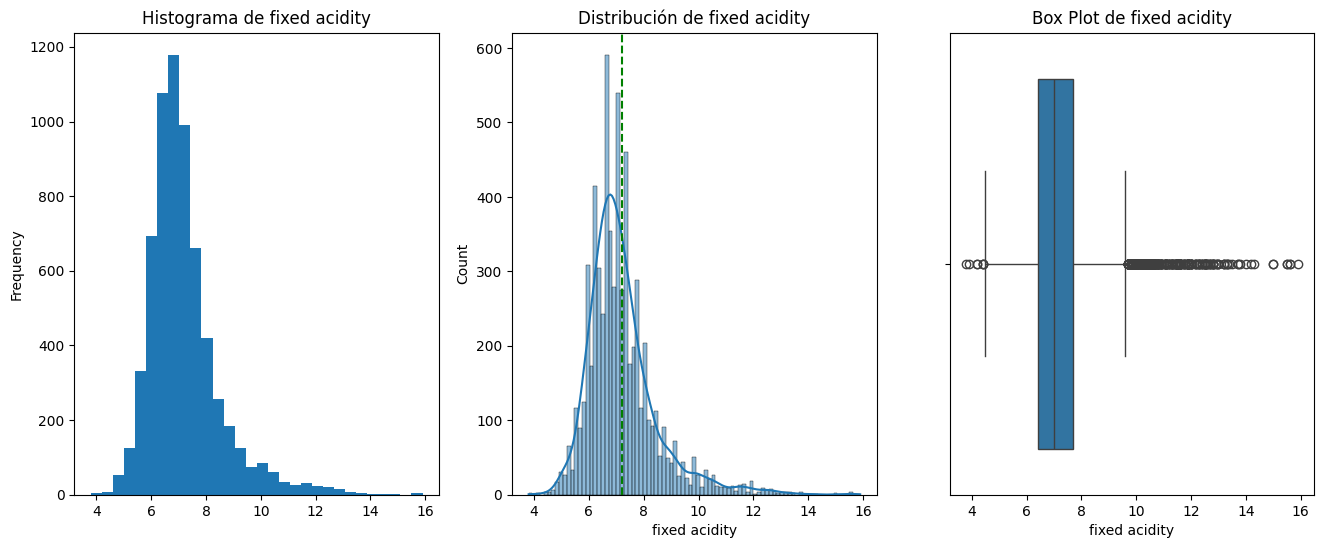

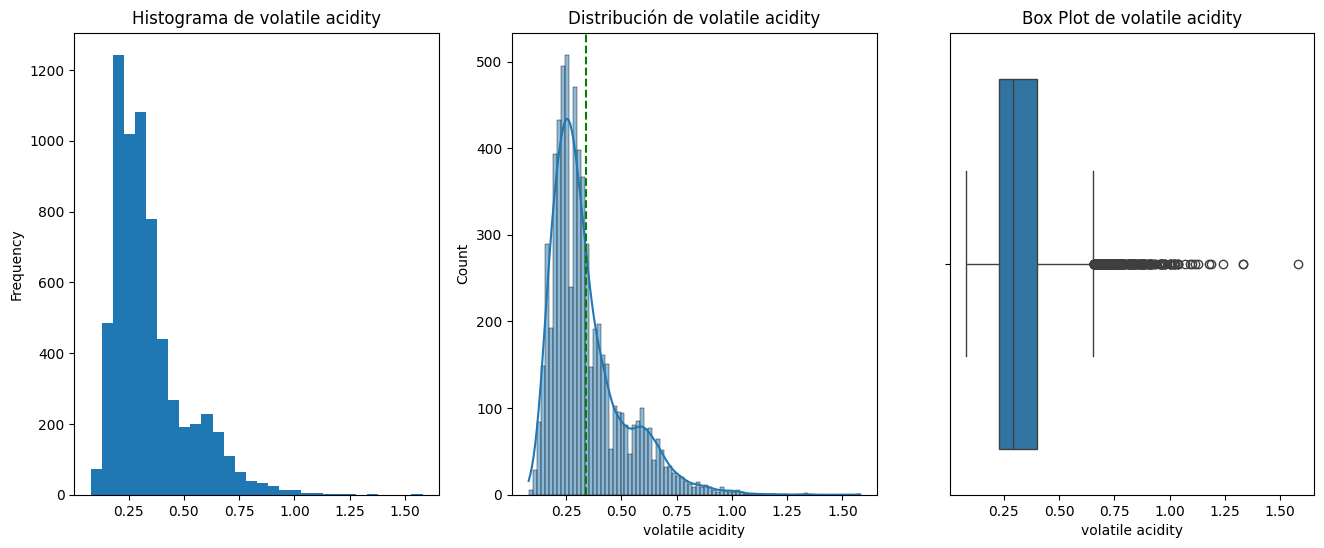

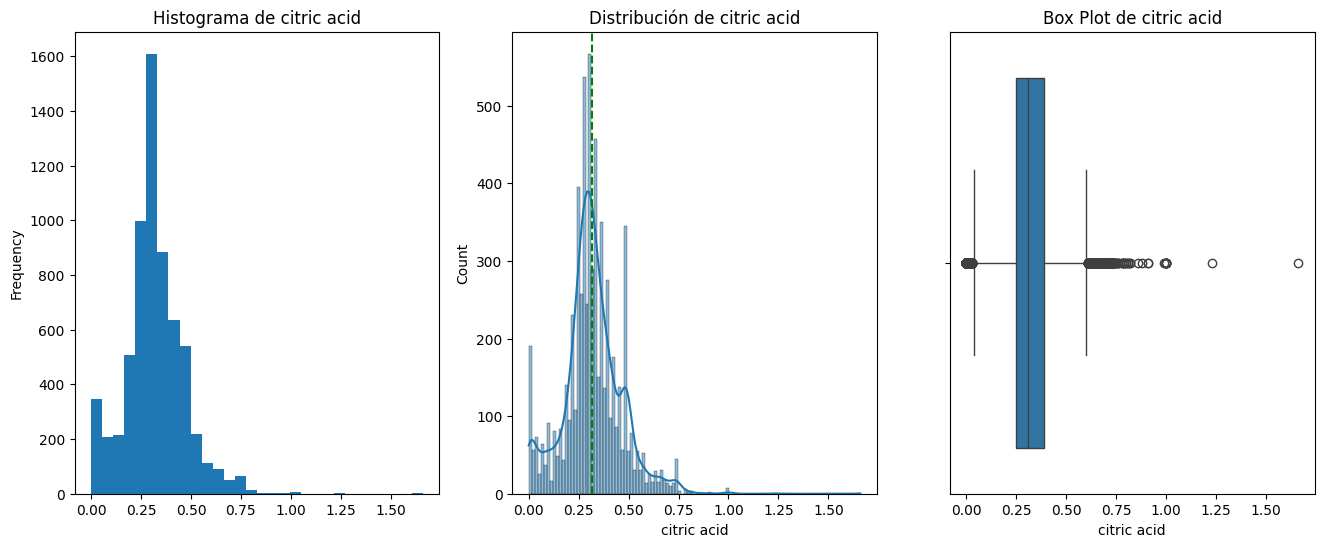

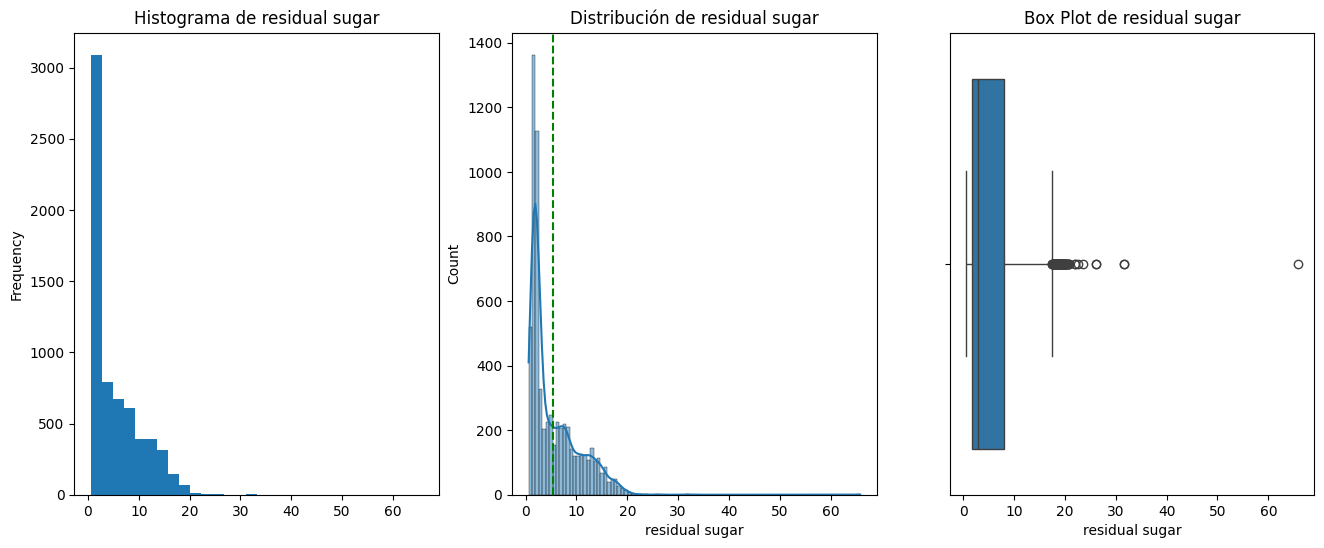

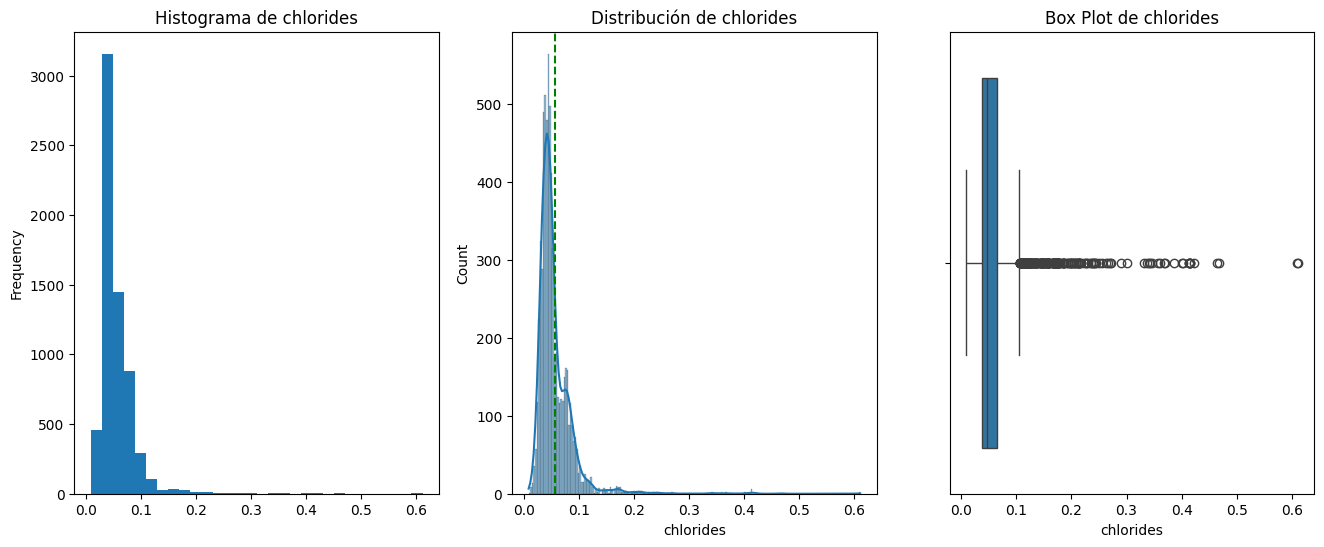

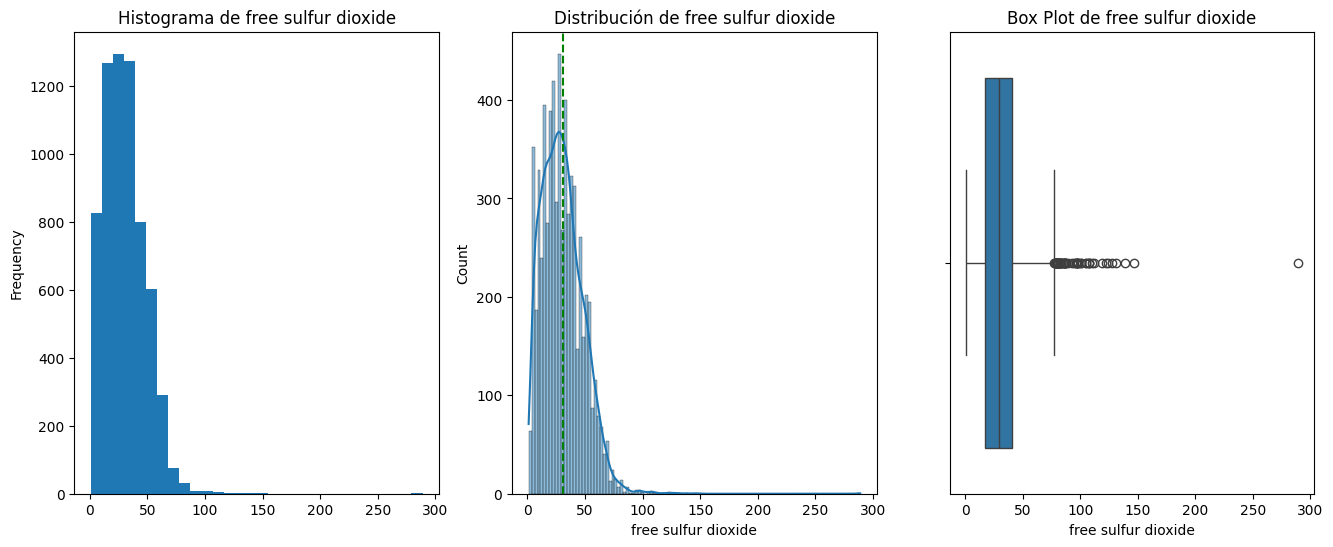

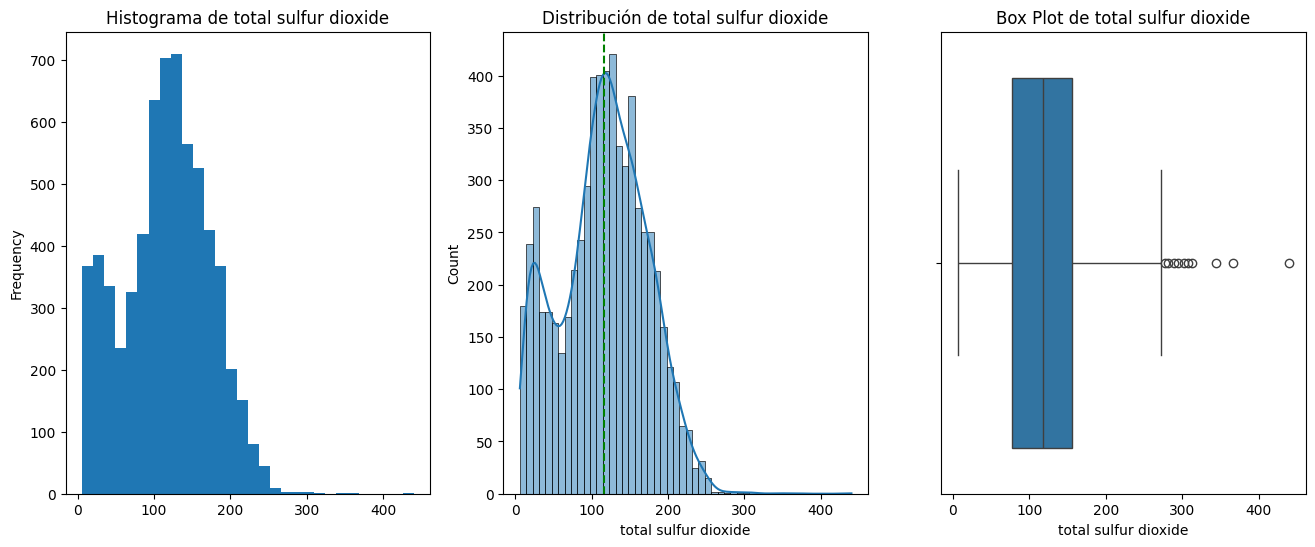

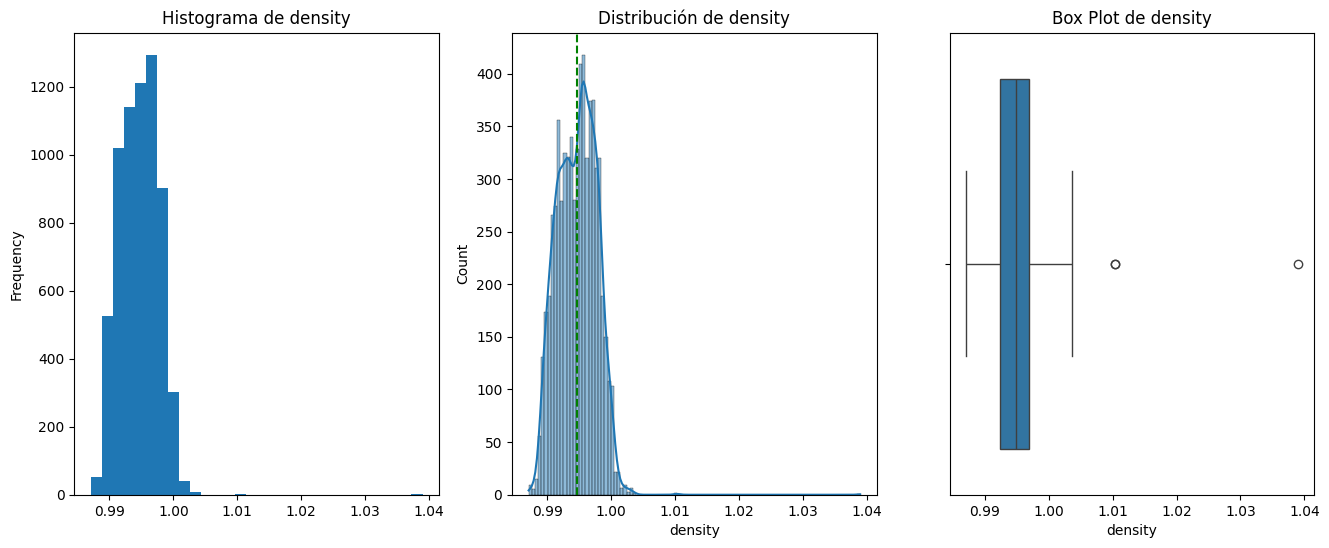

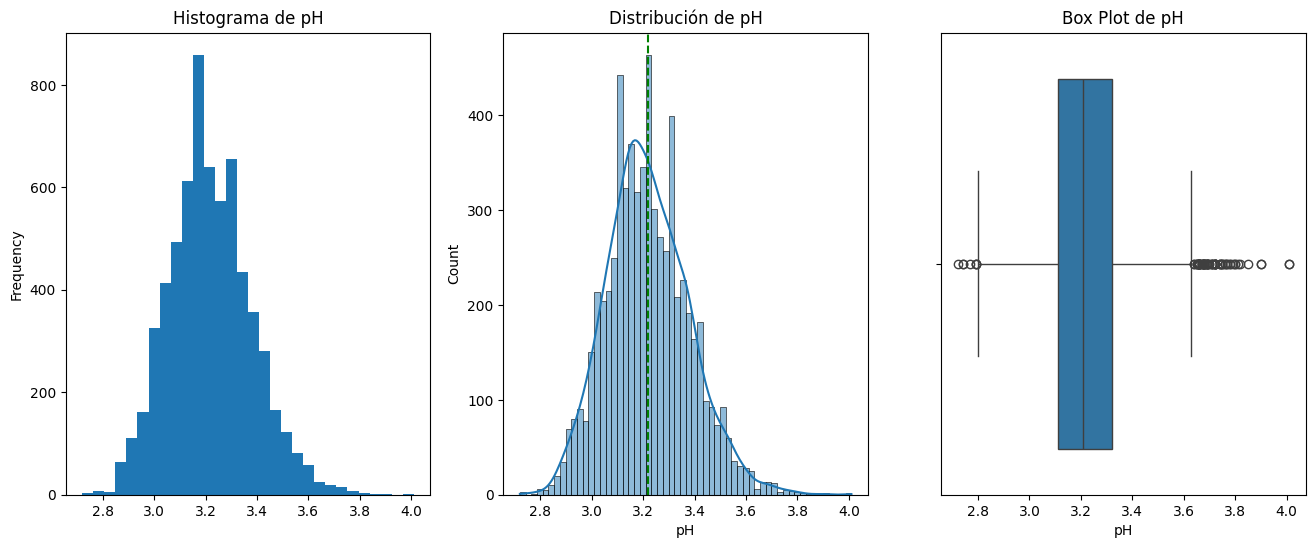

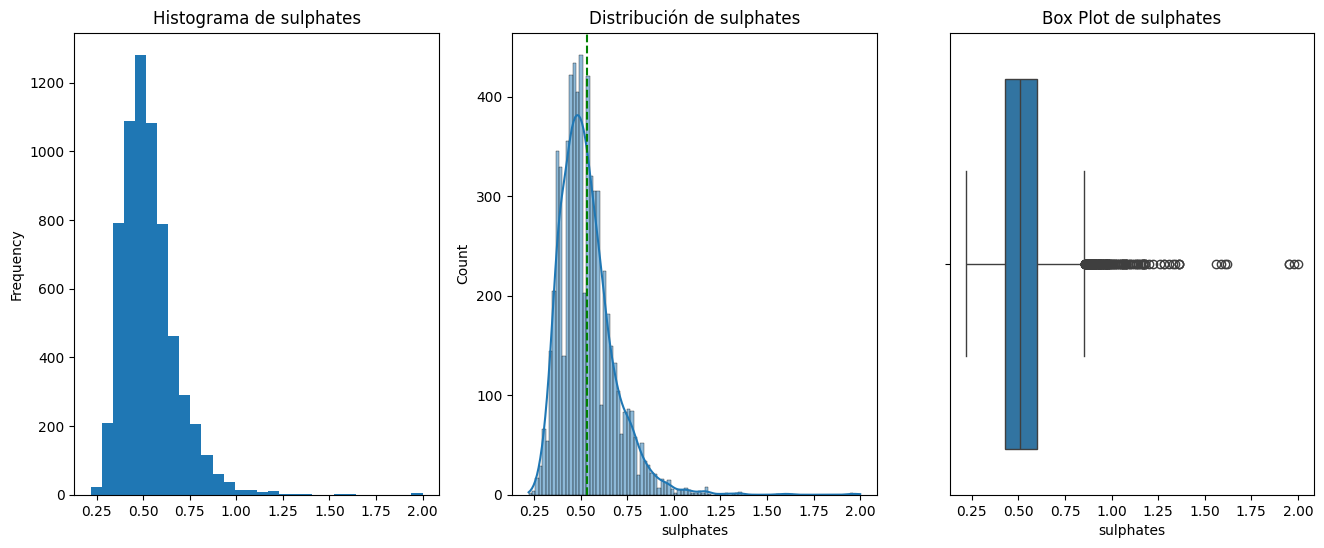

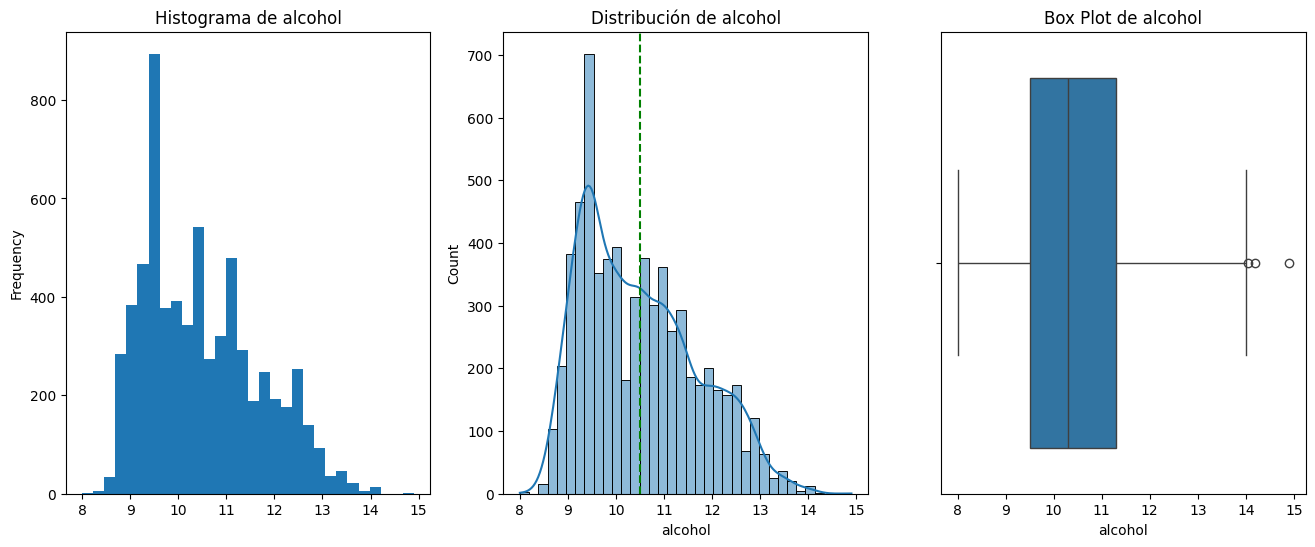

In [21]:
import scipy 
def feat_plot(data, var):
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 3, 1)
    data[var].plot(kind='hist', bins=30)
    plt.title(f'Histograma de {var}')
    
    plt.subplot(1, 3, 2)
    mu, sigma = scipy.stats.norm.fit(data[var])
    sns.histplot(data[var], kde=True)
    plt.axvline(mu, linestyle='--', color='green')
    plt.title(f'Distribución de {var}')
    
    plt.subplot(1, 3, 3)
    sns.boxplot(x=data[var])
    plt.title(f'Box Plot de {var}')
    plt.show()
    
    
numeric_vars = data.select_dtypes(include=['float64', 'int64']).columns.drop(['quality', 'wine type'])  # Excluir id, quality y wine type
for var in numeric_vars:
    feat_plot(data, var)

- Distribuciones Asimétricas: Algunas variables como residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide y alcohol muestran distribuciones altamente asimétricas.
- Distribuciones más simétricas y acotadas: Variables como fixed acidity, pH, density y sulphates parecen tener distribuciones más simétricas y están más concentradas en rangos específicos.
- Variables categóricas: quality y wine type 

La variable quality se trata de una variable numérica discreta que podemos tratar como categórica, además en el diagrama de barras vemos que las clases no están igualmente de representadas, siendo la más frecuente los vinos con calidad 6. Una acción que podemos tomar es agrupar en 3 categorías:

- malo: 3-5
- normal: 6
- bueno: 7-9

Esta agrupación nos permite reducir la dimensionalidad del espacio de valores posibles y conseguir categorías con frecuencias más próximas

C:\Users\alfre\AppData\Local\Temp\ipykernel_17704\764680567.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'bad' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[bad, var] = 'bad'


<BarContainer object of 3 artists>

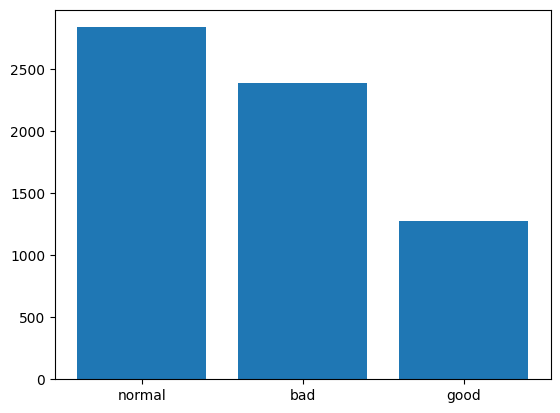

In [22]:
var = 'quality'

bad = data.loc[:, var] <= 5
normal = data.loc[:, var] == 6
good = data.loc[:, var] > 6

data.loc[bad, var] = 'bad'
data.loc[normal, var] = 'normal'
data.loc[good, var] = 'good'

quality_freq = data['quality'].value_counts()
plt.bar(quality_freq.index, quality_freq.values)

Las pasamos a dummies:

In [23]:
data_dummies = pd.get_dummies(data['quality'], prefix='quality')
data = pd.concat([data.drop(columns=['quality']), data_dummies], axis=1)

Convertimos a categórica wine type:

In [24]:
data['wine type'] = data['wine type'].astype('category')

La transformación logarítmica ha ayudado a reducir la asimetría y a manejar los valores extremos de manera más efectiva.

Aplicar la Transformación Logarítmica a las variables con distribuciones sesgadas y presencia de outliers para reducir el sesgo causado por outliers extremos

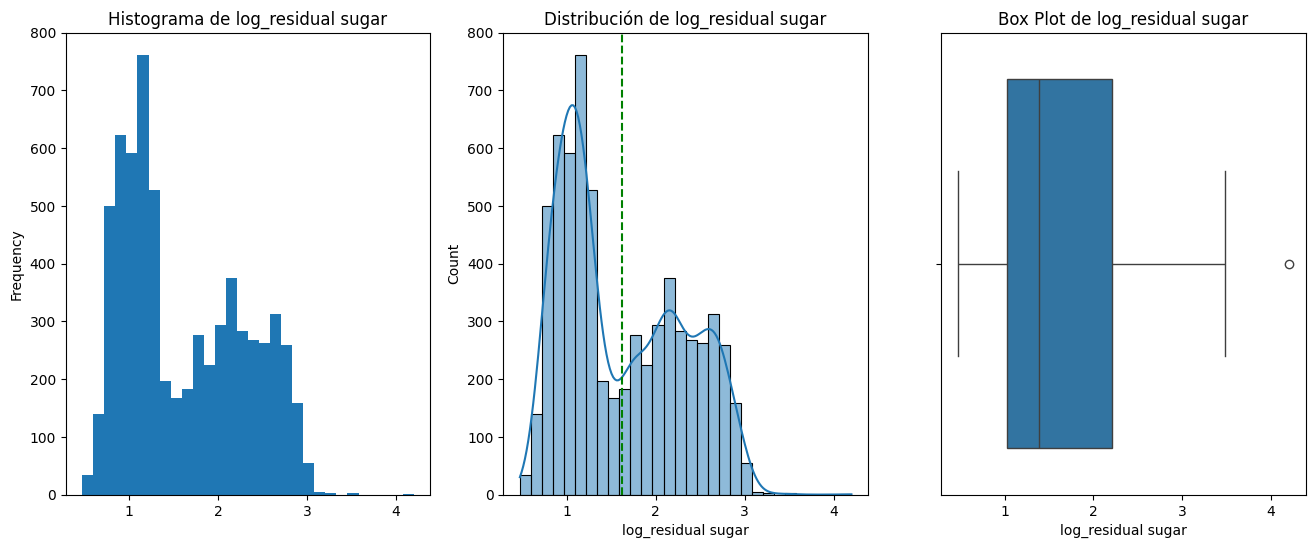

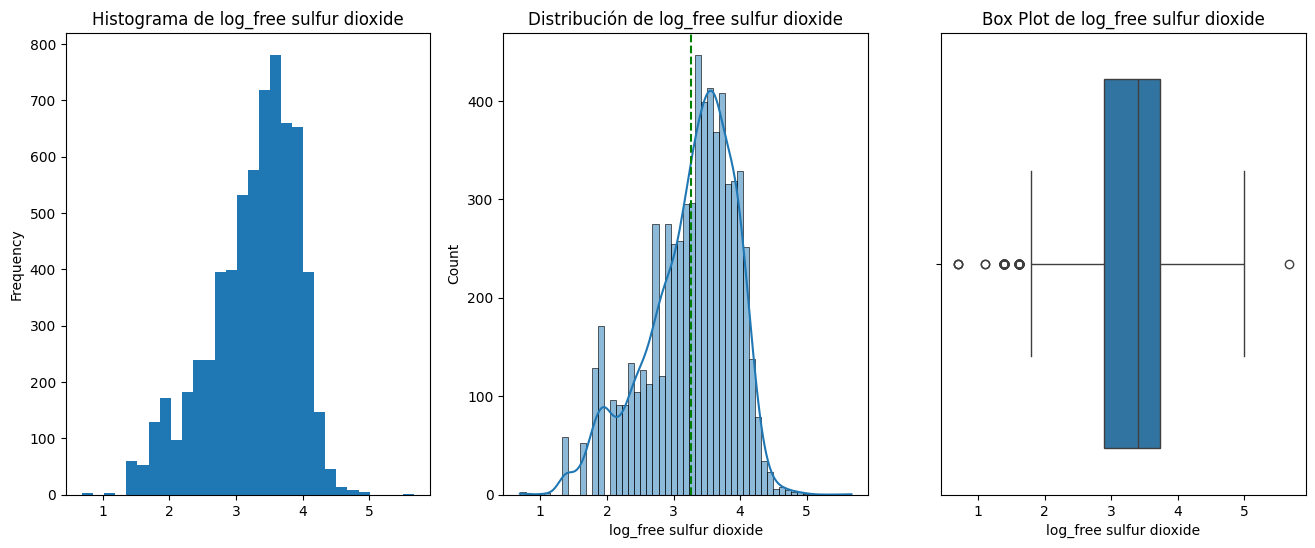

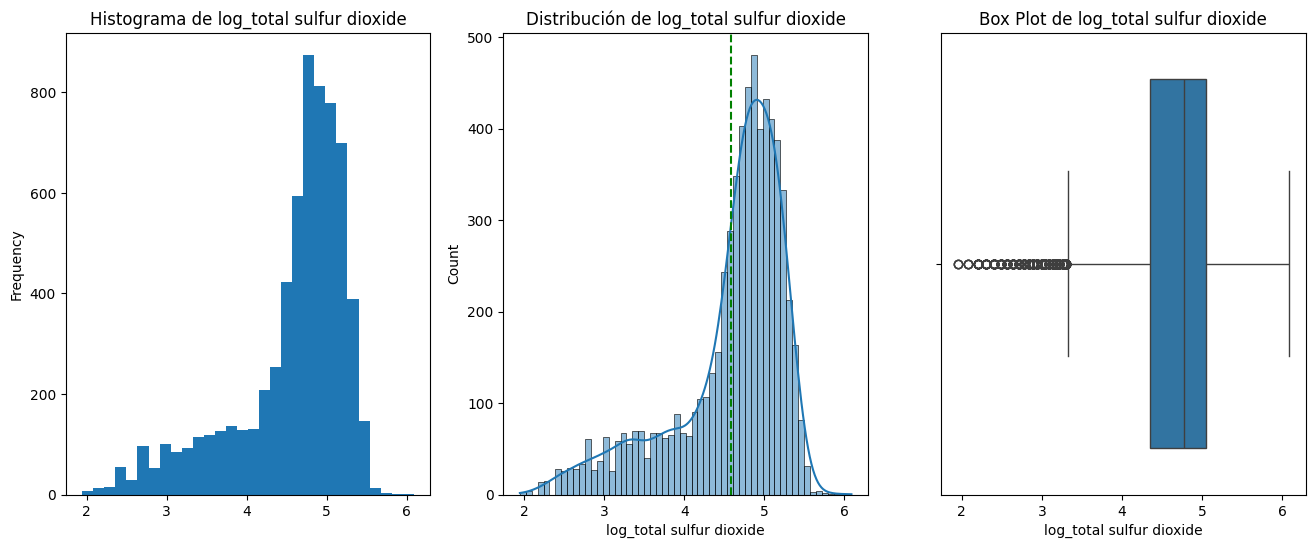

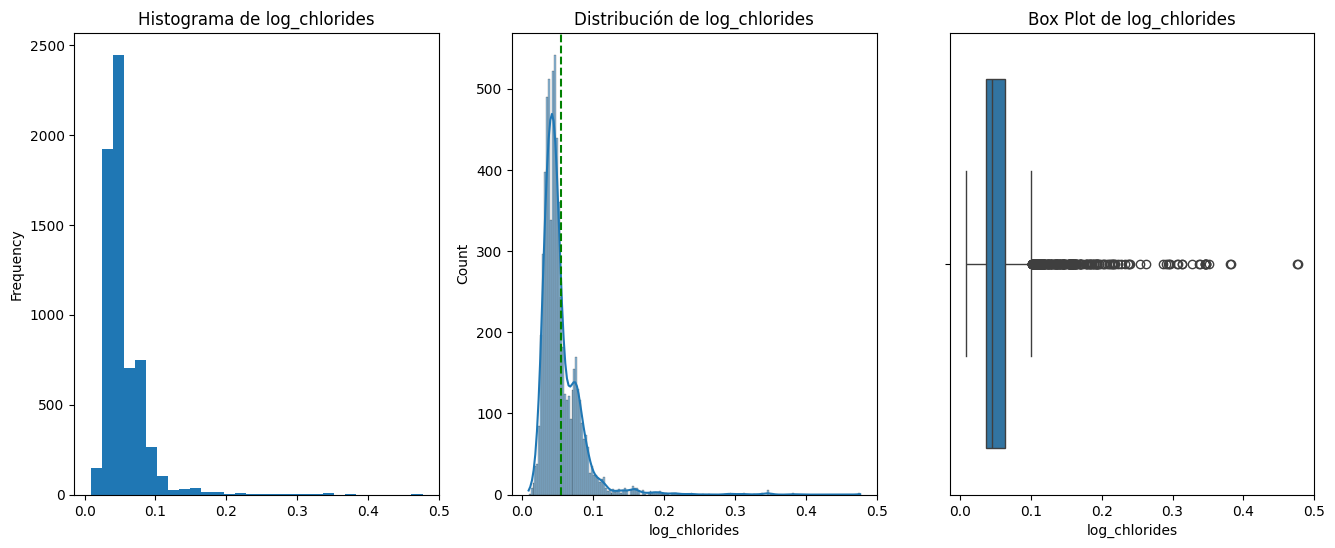

In [25]:
transformed_vars = ['residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'chlorides']
for var in transformed_vars:
    data[f'log_{var}'] = np.log1p(data[var])
    data.drop(var, axis=1, inplace=True)

for var in transformed_vars:
    feat_plot(data, f'log_{var}')

Eliminamos las observaciones que resulten ser outliers tras la transformación logarítmica:

In [26]:
numeric_columns = data.select_dtypes(include=['float64']).columns
for col in numeric_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)

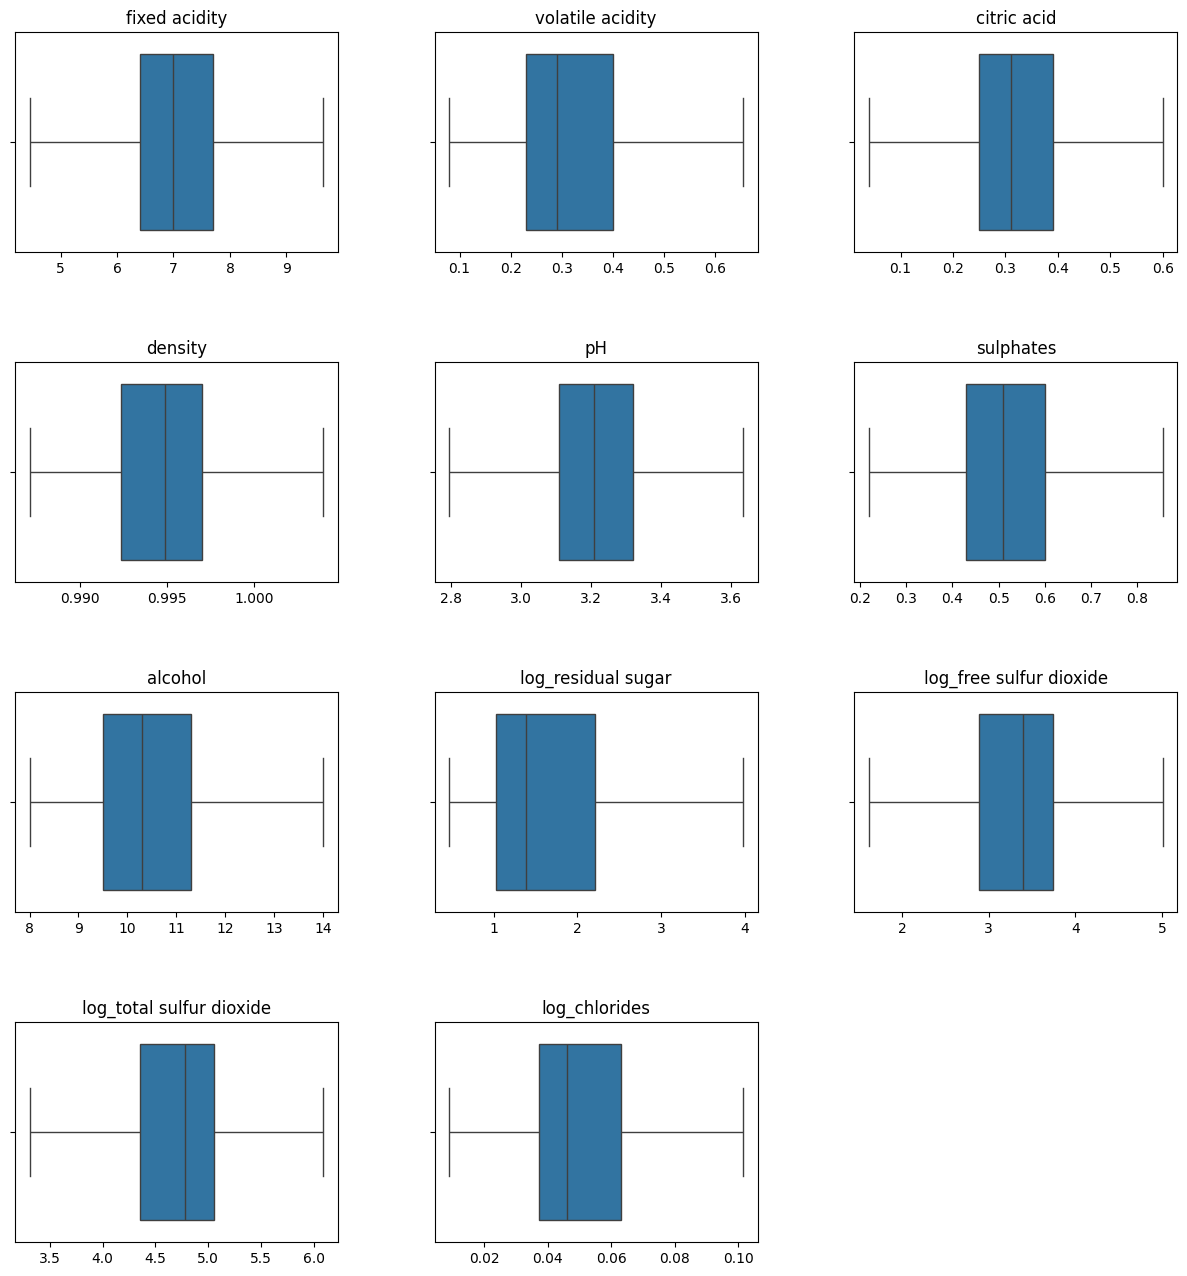

In [27]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
axes = axes.ravel()

numeric_columns = data.select_dtypes(include=['float64']).columns

for i, col in enumerate(numeric_columns):
    sns.boxplot(x=data[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')

for j in range(i+1, 15):
    fig.delaxes(axes[j])

plt.show()

Ponemos todas las observaciones de las variables categóricas en la escala de máximos-mínimos para preservar sus distancias relativas y mejorar la convergencia del algoritmo:

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])
data[numeric_columns].describe()

,fixed acidity,volatile acidity,citric acid,density,pH,sulphates,alcohol,log_residual sugar,log_free sulfur dioxide,log_total sulfur dioxide,log_chlorides
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.517726,0.439325,0.493178,0.449676,0.503141,0.482940,0.415271,0.328185,0.486988,0.470151,0.462012
std,0.205015,0.251088,0.235457,0.174542,0.187977,0.206608,0.198689,0.194517,0.191008,0.218433,0.217852
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.375000,0.260870,0.375000,0.310294,0.375000,0.330709,0.250000,0.159605,0.375000,0.377225,0.306224
50%,0.490385,0.365217,0.482143,0.461584,0.494048,0.456693,0.383333,0.261330,0.525722,0.529083,0.399522
75%,0.625000,0.556522,0.625000,0.586176,0.625000,0.598425,0.550000,0.495763,0.625000,0.628709,0.583735
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
data.head()

,fixed acidity,volatile acidity,citric acid,density,pH,sulphates,wine type,alcohol,quality_bad,quality_good,quality_normal,log_residual sugar,log_free sulfur dioxide,log_total sulfur dioxide,log_chlorides
0,0.567308,1.000000,0.000000e+00,0.634233,0.851190,0.535433,1,0.233333,True,False,False,0.169613,0.255365,0.089136,0.694783
1,0.644231,1.000000,0.000000e+00,0.574904,0.482143,0.724409,1,0.300000,True,False,False,0.231281,0.483499,0.327901,0.913513
2,0.644231,1.000000,4.163336e-17,0.586770,0.553571,0.677165,1,0.300000,True,False,False,0.206465,0.340247,0.251625,0.854297
3,1.000000,0.347826,9.285714e-01,0.646099,0.434524,0.566929,1,0.300000,False,False,True,0.169613,0.375000,0.288848,0.684734
4,0.567308,1.000000,0.000000e+00,0.634233,0.851190,0.535433,1,0.233333,True,False,False,0.169613,0.255365,0.089136,0.694783


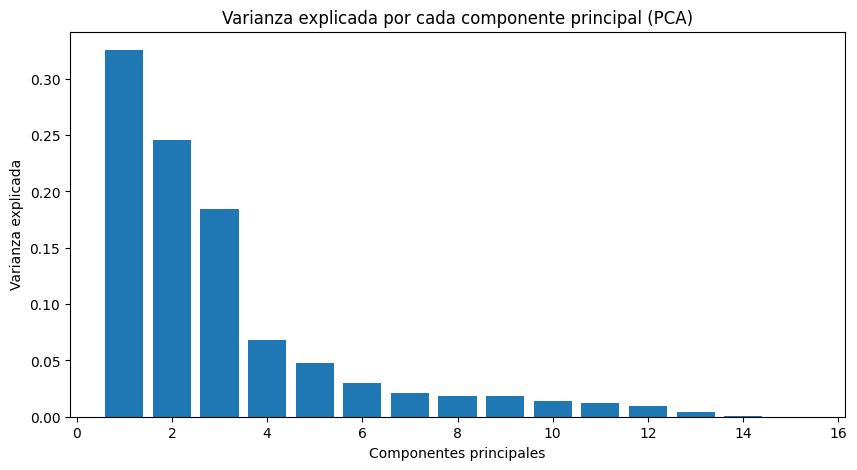

array([3.25523937e-01, 2.46112317e-01, 1.84514893e-01, 6.79673067e-02,
       4.75255334e-02, 2.99792829e-02, 2.11539073e-02, 1.81431819e-02,
       1.80446689e-02, 1.42025200e-02, 1.20028652e-02, 9.40381768e-03,
       4.49297006e-03, 9.32799401e-04, 5.72905211e-32])

In [30]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(data)
explained_variance = pca.explained_variance_ratio_

# Visualizar la varianza explicada por cada componente principal
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.ylabel('Varianza explicada')
plt.xlabel('Componentes principales')
plt.title('Varianza explicada por cada componente principal (PCA)')
plt.show()

explained_variance

Los tres primeros componentes principales son capaces de explicar en torno al 70% del dataset, por tanto, vamos a emplear dichos componentes para reducir la dimensionalidad.

#### 2- Ejecutar diferentes procesos de agrupamiento utilizando el algoritmo K-Means e identificar cual es el valor de k que mejor resultados ofrece (1 punto).
En necesario justificar la selección del mejor valor de k mediante la utilización de datos empíricos. 

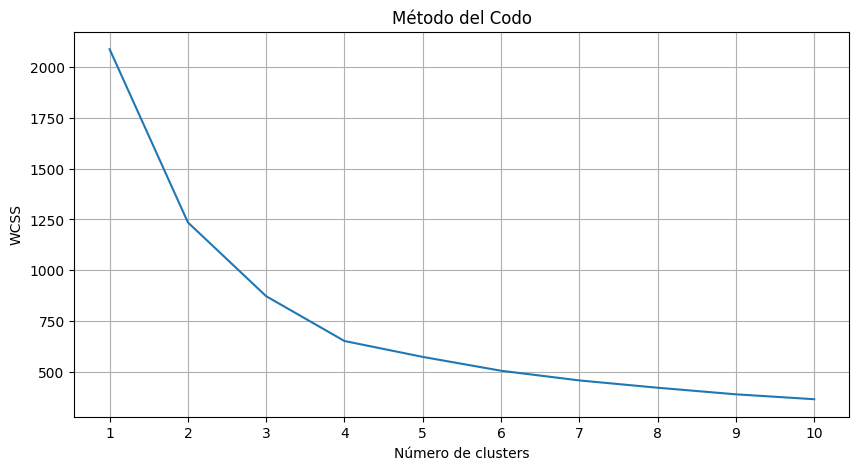

In [31]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

pca_3d = PCA(n_components=3)
principal_components = pca_3d.fit_transform(data[numeric_columns])

wcss = []
for i in range(1, 11):  # Evaluar de 1 a 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(principal_components)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('Método del Codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS') 
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

Parece ser que el número óptimo de clusteres serían 3 debido al cambio drástico de la pendiente.

#### 3- Analiza los clústeres obtenidos para el mejor valor de k y responde a las siguientes preguntas:  
• ¿Existe algún tipo de similitud entre los grupos obtenidos y los valores de la variable quality del 
dataset? (0.5 puntos).  
• ¿Cómo se diferencian los clústeres entre sí? (0.5 puntos). 
En necesario justificar las respuestas mediante la utilización de datos empíricos.

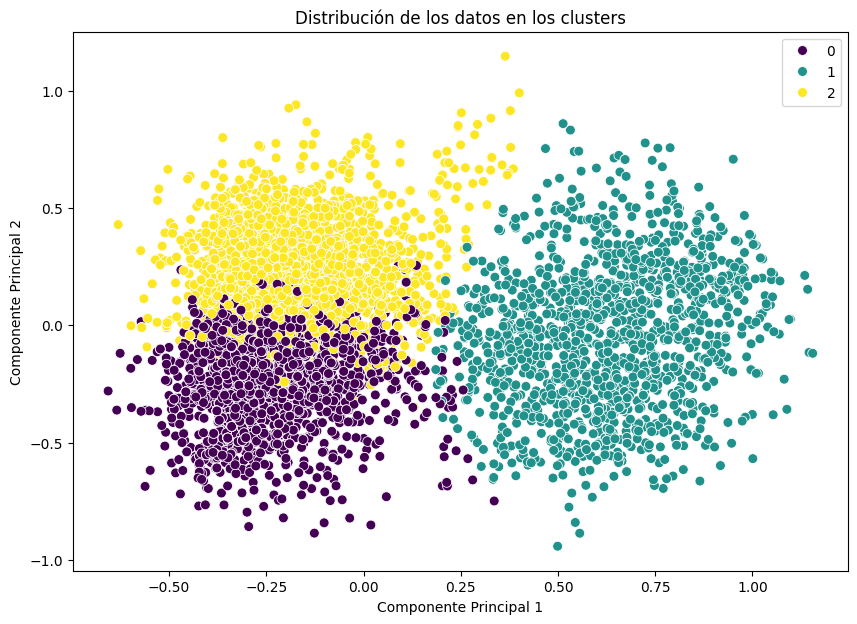

In [32]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(principal_components)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=clusters, palette='viridis', s=50)
plt.title('Distribución de los datos en los clusters')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

In [33]:
data['cluster'] = kmeans.labels_
quality_columns = [col for col in data.columns if 'quality' in col]
quality_summary = data.groupby('cluster')[quality_columns].sum()
cluster_sizes = data['cluster'].value_counts().sort_index()
quality_proportions = quality_summary.div(cluster_sizes, axis=0)

# Calcular el resumen numérico y unirlo con las proporciones de calidad
numeric_summary = data.select_dtypes(include=[np.number]).groupby('cluster').mean()
cluster_summary = numeric_summary.join(quality_proportions)

# Mostrar el resumen extendido
print(cluster_summary)

         fixed acidity  volatile acidity  citric acid   density        pH  \
cluster                                                                     
0             0.489135          0.347337     0.547925  0.561092  0.432410   
1             0.694151          0.743772     0.411609  0.573605  0.603216   
2             0.435997          0.334165     0.496035  0.281663  0.502632   

         sulphates   alcohol  log_residual sugar  log_free sulfur dioxide  \
cluster                                                                     
0         0.427898  0.265399            0.523931                 0.614510   
1         0.657041  0.391534            0.214593                 0.297628   
2         0.424854  0.555558            0.231647                 0.493259   

         log_total sulfur dioxide  log_chlorides  quality_bad  quality_good  \
cluster                                                                       
0                        0.637181       0.438364     0.460473      0.0

0. Cluster 0:

- Características químicas: Este cluster tiene niveles moderados de acidez fija, acidez volátil, y citricidad. La cantidad de azúcar residual es alta, así como la densidad y los sulfatos.
- Proporciones de calidad: La mayoría de los vinos en este cluster son calificados como normales (44%), seguidos por los vinos malos (46%) y una menor proporción de buenos (10%). Este cluster podría representar vinos con características balanceadas pero no excepcionales.

1. Cluster 1:
- Características químicas: Este cluster se caracteriza por tener la mayor acidez volátil y los niveles más altos de cloruros, lo que podría indicar vinos más robustos o con posibles defectos. La cantidad de azúcar residual es baja y los niveles de dióxido de azufre son significativamente menores.

- Proporciones de calidad: Predomina una cantidad similar de vinos normales (39%) y malos (48.4%), con una pequeña cantidad de buenos (12.6%). Esto sugiere que este cluster 
incluye vinos de peor calidad.

2. Cluster 2:
- Características químicas: Presenta los niveles más bajos de cloruros y una densidad relativamente baja comparada con los otros clusters. Los niveles de ácido cítrico son también moderados, pero mejores que en el cluster 1.

- Proporciones de calidad: Este cluster tiene una mayor diversidad en las calificaciones, con una representación más equilibrada de vinos normales (46.2%) y buenos (32%), y la menor proporción de vinos malos (21.7%). Este cluster podría representar vinos de calidad decente, con una mayor propensión hacia características más deseables.

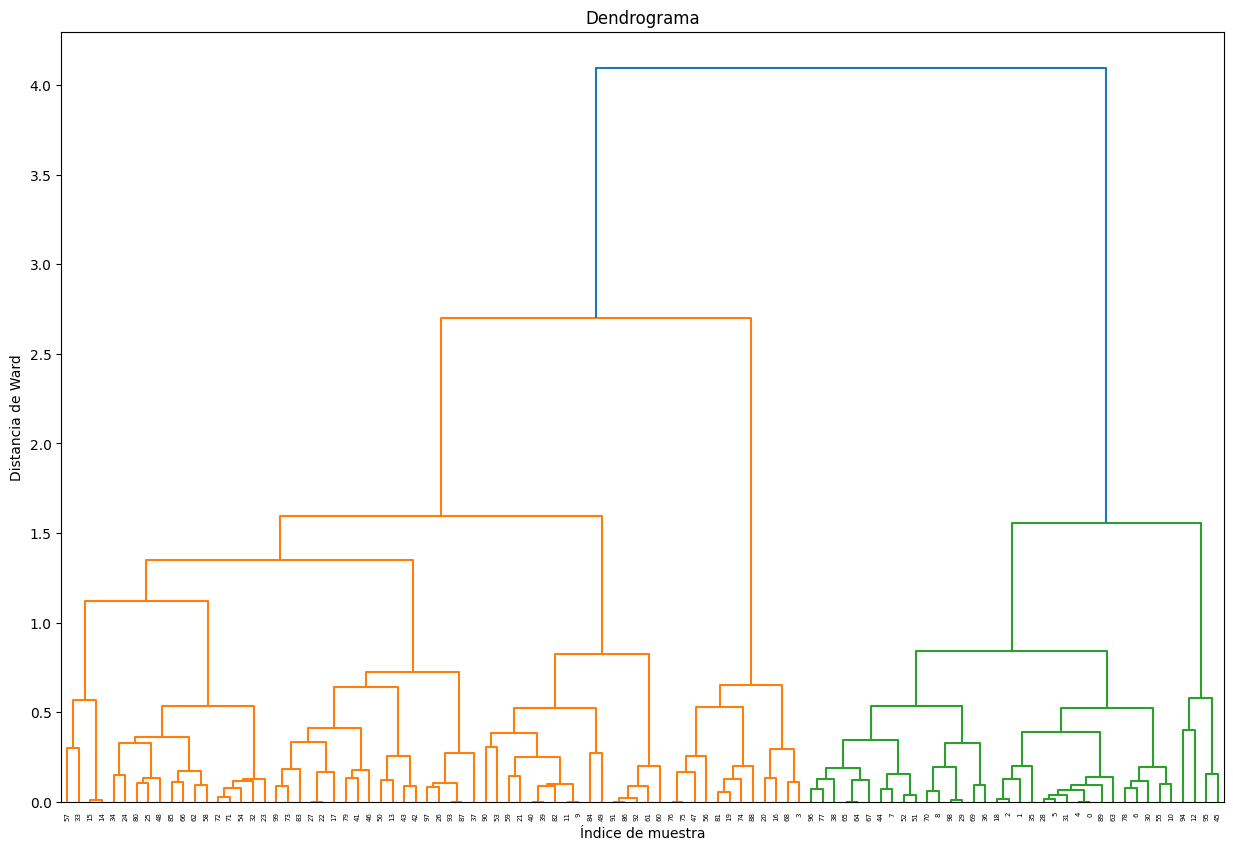

In [34]:
from scipy.cluster.hierarchy import dendrogram, linkage
sample_data = principal_components[:100]  # Reducir el tamaño de los datos para el dendrograma
linked_sample = linkage(sample_data, method='ward')

# Crear el dendrograma para la muestra reducida
plt.figure(figsize=(15, 10))
dendrogram(linked_sample, 
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrograma')
plt.xlabel('Índice de muestra')
plt.ylabel('Distancia de Ward')
plt.show()

In [35]:
data.head()

,fixed acidity,volatile acidity,citric acid,density,pH,sulphates,wine type,alcohol,quality_bad,quality_good,quality_normal,log_residual sugar,log_free sulfur dioxide,log_total sulfur dioxide,log_chlorides,cluster
0,0.567308,1.000000,0.000000e+00,0.634233,0.851190,0.535433,1,0.233333,True,False,False,0.169613,0.255365,0.089136,0.694783,1
1,0.644231,1.000000,0.000000e+00,0.574904,0.482143,0.724409,1,0.300000,True,False,False,0.231281,0.483499,0.327901,0.913513,1
2,0.644231,1.000000,4.163336e-17,0.586770,0.553571,0.677165,1,0.300000,True,False,False,0.206465,0.340247,0.251625,0.854297,1
3,1.000000,0.347826,9.285714e-01,0.646099,0.434524,0.566929,1,0.300000,False,False,True,0.169613,0.375000,0.288848,0.684734,1
4,0.567308,1.000000,0.000000e+00,0.634233,0.851190,0.535433,1,0.233333,True,False,False,0.169613,0.255365,0.089136,0.694783,1
